# Email Engagement Analysis

## Business case <a name='business_case'/>
Your university is trying to answer questions on email engagement. The school is
worried about the perception of email spam, and want to reduce the number of emails
sent to students.
To focus on email engagement means that you are looking at how students interact with
emails from a school. For example, do they:
- Open the email?
- Read the content?
- Click on links?
- Follow a call to action?


## Table of Contents

- [Business case](#business_case) 
- [Intalling the requirements](#requirements)
- [Exploring the data](#exploring)
- [Analysis](#analysis)
    - [Q1. What are the average number of emails that are being sent per student?](#q1)
    - [Q2. What is the average open rate per student?](#q2)
    - [Q3. How many emails remain unopened (count and %)? ](#q3)
    - [Q4. How many emails does it take (number of delivered) to get students to open an email?](#q4)
    - [Q5. Among students who unsubscribed (emailUnsubscribed), how many emails on average were they sent?](#q5)
    - [Q6. How does email engagement change over the course of enrollment milestones (Prospects→ Applicants→ Admitted) ?](#q6)
    - [Q7. Are there “windows” where applicants/deposited students complete more actions? ](#q7)
    - [Q8. Compute an “engagement score” that combines the actions that lead to higher conversion. ](#q8)

### Installing the requirements  <a name='requirements'/>

In [1]:
#importing packages and requirements
import matplotlib.pyplot as plt
import pandas as pd
import os.path

home = os.path.expanduser('~')

In [2]:
#importing datasets
path_users = f'{home}/Projects/Email Engagement/Data sets/users.csv'
path_actions = f'{home}/Projects/Email Engagement/Data sets/actions.csv'

users = pd.read_csv(path_users, low_memory=False)
actions = pd.read_csv(path_actions, low_memory=False)

### Exploring the data  <a name="exploring"/>

In [3]:
users.head(5)

,Deposit,Admit,Apps Started,active term,Major*,Prospects,Apps Submit,Address Home Country,Created At,Date Of Birth,...,Milestone Prospect Date,Milestone Prospect Source,Milestone Unsubscribe Email Date,Milestone Unsubscribe Sms Date,Milestone Unsubscribe Sms Email,Milestone Unsubscribe Sms Number,Milestone Visit Date,Milestone Waitlist Date,Milestone Withdraw Date,Milestone Withdraw Term
0,0,0,0,Fall 2019,Technion-Cornell Dual Masters Degree in Connec...,0,0,USA,12/28/17 16:02,NaN,...,NaN,NaN,1/7/19 21:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,Fall 2019,Master of Engineering in Electrical and Comput...,0,0,USA,12/28/17 16:03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,Fall 2019,Johnson Cornell Tech MBA,1,0,TUR,12/28/17 16:10,NaN,...,2/8/18 0:25,workflows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,Fall 2019,Master of Engineering in Computer Science,1,0,USA,12/28/17 16:13,NaN,...,2/13/18 22:00,NaN,9/5/18 22:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,Fall 2019,Master of Engineering in Operations Research a...,1,0,IND,12/28/17 16:17,NaN,...,10/23/18 15:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
actions.head(5)

,Action,Bounce Categorie,Browser Family,Campaign Date,Campaign Guid,Campaign Month,Campaign Population,Campaign Year,Device Type,Dvce Ismobile,...,Page Urlhost,Page Urlpath,Seed,Sms Content,Survey Guid,Target Url,Timestamp,Tracker Ident,Updated At,Variant Id
0,pageview,NaN,Chrome,NaN,NaN,NaN,Other,NaN,Other,False,...,tech.cornell.edu,/,NaN,NaN,NaN,NaN,6/26/19 17:57,NaN,6/26/19 18:20,NaN
1,pageview,NaN,Chrome,NaN,NaN,NaN,Other,NaN,Other,False,...,tech.cornell.edu,/programs/phd/phd-studies/,NaN,NaN,NaN,NaN,10/1/19 18:16,NaN,10/1/19 18:20,NaN
2,pageview,NaN,Safari,NaN,NaN,NaN,Other,NaN,Other,False,...,tech.cornell.edu,/news/category/research/,NaN,NaN,NaN,NaN,6/26/19 17:58,NaN,6/26/19 18:20,NaN
3,pageview,NaN,Chrome,NaN,NaN,NaN,Other,NaN,Other,False,...,tech.cornell.edu,/admissions/admissions-events/,NaN,NaN,NaN,NaN,10/1/19 18:11,NaN,10/1/19 18:20,NaN
4,pageview,NaN,Chrome,NaN,NaN,NaN,Other,NaN,Other,False,...,tech.cornell.edu,/research/human-computer-interaction-hci/,NaN,NaN,NaN,NaN,6/26/19 17:59,NaN,6/26/19 18:20,NaN


In [5]:
user_col = users.columns
actions_col =actions.columns
user_col.intersection(actions_col)

Index(['Element Id'], dtype='object')

From the interection of indices of 'users' and 'actions' datasets, we see that 'Element Id' is the common index. We will use this column to join the two datasets. Each observation in the column 'Element Id' refers to a unique user.

**Note:** One thing to keep in mind is that the 'action' dataset contains multiple occurences of the same 'Element Id' as it made observations of the different actions performed by a user.

We need to join the two datasets using 'Element Id' in a way that all the actions performed by a unique 'Element Id' is included in the new dataset. Since we require all the actions performed by the users, we need to perform a **right join** on 'Element Id'.

In [6]:
df = pd.merge(users,actions,how='right',on='Element Id')

Removing the rows that contain NaN in the column 'Element Id'

In [7]:
df = df.dropna(subset = ['Element Id'])

The new **df** is the dataset that stores the information of all the actions performed by every user. **For example**, we can see below that it stores all the actions performed by the user with 'Element Id' as '5bd00debc2a9d80d47025bb4'.


In [8]:
df.loc[df['Element Id'] =='5bd00debc2a9d80d47025bb4',['Action']]

,Action
324270,userCreated
329388,emailDelivered
334797,emailOpened
339983,emailDelivered
340000,emailOpened
...,...
1050904,emailClicked
1050920,emailOpened
1051027,emailClicked
1051083,emailOpened


Let's explore what are the different actions that can be performed by a user.

In [9]:
df['Action'].unique().tolist()

['emailOpened',
 'emailClicked',
 'userLogin',
 'userCreated',
 'emailDelivered',
 'formSaved',
 'emailBounced',
 'emailUnsubscribed',
 'emailAuthComplaint',
 'emailComplaint',
 'applicationRegistrationSuccessful',
 'pageview',
 'linkClick',
 'applicationSubmitted',
 'recommendationReceived',
 'recommendationRequested',
 'applicationPaid',
 'smsDelivered']

We see that a user can perform 18 different actions. The actions are pretty self explanatory, so I will not go into the details here. Let's start answering some important questions for our analysis.

### Answering important question for the analysis <a name='analysis'/>

#### Q1. What are the average number of emails that are being sent per student? <a name='q1'/>

The average number of emails being sent per student can be calculated by the following formula - 

$$
\text{Average number of emails per student } = \frac{\text{Total number of emails delivered}}{\text{Number of unique students}}
$$

In [10]:
total_emails_delivered = sum(df['Action'] == 'emailDelivered')
no_unique_students = df['Element Id'].nunique()

email_per_student = total_emails_delivered/no_unique_students
email_per_student

8.457067963509063

Therefore, the average number of emails sent per student is around **8 emails**.

___

#### Q2. What is the average open rate per student? <a name='q2'/>

The average open rate per student can be calculated as -

$$
\text{Average open rate per student} = \frac{\text{Total number of emails opened}}{\text{Number of unique students}}
$$

In [11]:
total_emails_opened = sum(df['Action'] == 'emailOpened')

open_rate_per_student = total_emails_opened/no_unique_students
open_rate_per_student

4.939555417593598

So on average, students are opening **5 out of the 8 emails** sent to them.

___

#### Q3. How many emails remain unopened (count and %)? <a id='q3'/>

To get the number of unopened emails, we can substract the number of emails opened from the total number of emails delivered.

$$
\text{Number of unopened emails} = \text{Number of emails delivered} - \text{Number of emails opened}
$$

And to get the percentage of unopened emails -

$$
\text{% of unopened emails} = \frac{\text{Number of emails unopened}}{\text{total number of emails delivered}} \times 100
$$

In [12]:
no_unopened_emails = total_emails_delivered - total_emails_opened
no_unopened_emails

203970

**203,970 emails** remain unopened.

In [13]:
percent_emails_unopened = (no_unopened_emails/total_emails_delivered)*100
percent_emails_unopened

41.59257748776509

Therefore, we observe that **41.6%** of emails delivered remain **unopened**.

___

#### Q4.  How many emails does it take (number of delivered) to get students to open an email? <a name='q4'/>

To determine this number, we need to determine the number of emails sent per number of emails opened.

$$
\text{Number of emails sent per number of emails opened} = \frac{\text{Total number of emails delivered}}{\text{Total number of emails opened}}
$$

In [14]:
email_sent_per_open = total_emails_delivered/total_emails_opened
email_sent_per_open

1.7121111615403415

This shows that about **2 emails** were sent before the student opened the email.

___

#### Q5. Among students who unsubscribed (emailUnsubscribed), how many emails on average were they sent? <a name='q5'/>

This can be calculated by creating a subset of the original dataset containing all the 'Element Id' that unsubscribed from emails, and then calculating the average number of emails delivered to the 'Element Id' on this subset.

In [15]:
unsub_list = df.loc[df['Action'] == 'emailUnsubscribed', 'Element Id'].tolist()
unsub_df = df[df['Element Id'].isin(unsub_list)]

unsub_emails_delivered = sum(unsub_df['Action']=='emailDelivered')
unsub_users = unsub_df['Element Id'].nunique()

avg_email_unsub = unsub_emails_delivered/unsub_users
avg_email_unsub

6.266007144820006

So, the students who unsubsribed were sent an average of **6 emails**. 

___

#### Q6. How does email engagement change over the course of enrollment milestones (Prospects→ Applicants→ Admitted) ? <a name='q6'/>

Email engagement in this case includes the following actions performed by the user -

* 'emailOpened'
* 'emailClicked'

Lets get them in a list that we can use later.


In [16]:
engagement = ['emailOpened','emailClicked']

The information about student categories is stored in the column 'Campaign Population'-

In [17]:
df['Campaign Population'].unique().tolist()

['Other',
 'Prospect',
 'Graduate',
 'Deposit',
 'Admit',
 'Admit/Deposit',
 'Event',
 'Applicant',
 'Community Counselor']

Let us divide the students that belong to Prospect, Applicant, and Admit respectively. Then we can measure the engagement based on different milestones.

In [18]:
prospect_df = df.loc[df['Campaign Population']=='Prospect'] 
applicant_df = df.loc[df['Campaign Population']=='Applicant']
admit_df = df.loc[df['Campaign Population']=='Admit']

Now we have three datasets containing information of students from the different milestones, namely Prospect, Applicant, Admit. We can now measure engagement based on each milestone.


Engagement can be calculated as a percentage of total email actions per email delivered.

$$
\text{Engagement} = \frac{\text{Total email engagement}}{\text{Total emails delivered}} \times 100
$$

In [19]:
prospect_email_engage = sum(prospect_df['Action'].isin(engagement))
prospect_email_deliver = sum(prospect_df['Action'].isin(['emailDelivered']))
prospect_engage = (prospect_email_engage/prospect_email_deliver)*100
print('Prosepct Engagement' + ' = ' +str(prospect_engage)+' %' )

applicant_email_engage = sum(applicant_df['Action'].isin(engagement))
applicant_email_deliver = sum(applicant_df['Action'].isin(['emailDelivered']))
applicant_engage = (applicant_email_engage/applicant_email_deliver)*100
print('Applicant Engagement' + ' = ' +str(applicant_engage)+' %' )

admit_email_engage = sum(admit_df['Action'].isin(engagement))
admit_email_deliver = sum(admit_df['Action'].isin(['emailDelivered']))
admit_engage = (admit_email_engage/admit_email_deliver)*100
print('Admit Engagement' + ' = ' +str(admit_engage)+' %' )

Prosepct Engagement = 63.46367473894689 %
Applicant Engagement = 192.6513671875 %
Admit Engagement = 460.8915906788247 %


Therefore we see that the engagement increases as students move ahead in milestones. 

**Note:** Percentages higher than hundred suggest that students checked their emails more than once. The results are - 

|Milestone|Engagement|
|-|-|
|Prospects|64.5%|
|Applicants|192.7%|
|Admit|460.9%|

___

#### Q7. Are there “windows” where applicants/deposited students complete more actions? <a name='q7'/>
*For example, an admitted student opens 10 emails in 12 weeks, but 50% of them during the 1st week*


Let's start by making a dataset with only applicants/deposited students.

In [20]:
# we alrady made a dataset with applicant students, applicant_df
deposit_df = df.loc[df['Campaign Population']=='Admit/Deposit']

Now we have to convert the column 'Timestamp' to ```DatetimeIndex```

In [21]:
applicant_df['Dates'] = pd.to_datetime(applicant_df['Timestamp'])
deposit_df['Dates'] = pd.to_datetime(deposit_df['Timestamp'])

<ipython-input-21-3f882017d97c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applicant_df['Dates'] = pd.to_datetime(applicant_df['Timestamp'])
<ipython-input-21-3f882017d97c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit_df['Dates'] = pd.to_datetime(deposit_df['Timestamp'])


Setting ```'Dates'``` as index so that we can resample them by weeks.

In [22]:
applicant_df.set_index('Dates', inplace=True)
deposit_df.set_index('Dates', inplace=True)

Making a new column `'ActionCount'` to keep a count of actions

In [23]:
applicant_df.loc[applicant_df['Action']!='emailDelivered', 'ActionCount'] = 1
applicant_df.loc[applicant_df['Action']=='emailDelivered', 'ActionCount'] = 0

deposit_df.loc[deposit_df['Action']!='emailDelivered', 'ActionCount'] = 1
deposit_df.loc[deposit_df['Action']=='emailDelivered', 'ActionCount'] = 0

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Now we can resample the datasets weekly and calculate the sum of actions taken on a weekly basis.

For **deposited** students - 

In [24]:
deposit_action = deposit_df['ActionCount'].resample('W').sum()
print(deposit_action)

Dates
2018-12-23    171.0
2018-12-30    179.0
2019-01-06    171.0
2019-01-13    222.0
2019-01-20    244.0
2019-01-27    223.0
2019-02-03    183.0
2019-02-10    396.0
2019-02-17    675.0
2019-02-24    727.0
2019-03-03    767.0
2019-03-10    772.0
2019-03-17    720.0
2019-03-24    770.0
2019-03-31    619.0
2019-04-07    824.0
2019-04-14    973.0
2019-04-21    619.0
2019-04-28    361.0
2019-05-05    246.0
2019-05-12     79.0
2019-05-19     63.0
2019-05-26     50.0
2019-06-02     30.0
2019-06-09     45.0
2019-06-16     26.0
2019-06-23     25.0
2019-06-30     10.0
2019-07-07      0.0
2019-07-14      0.0
2019-07-21      0.0
2019-07-28      0.0
2019-08-04      0.0
2019-08-11      0.0
2019-08-18      0.0
2019-08-25      0.0
2019-09-01      0.0
2019-09-08      0.0
2019-09-15      0.0
2019-09-22      0.0
2019-09-29      0.0
2019-10-06      2.0
Freq: W-SUN, Name: ActionCount, dtype: float64


For **Applicant** students- 

In [25]:
applicant_action = applicant_df['ActionCount'].resample('W').sum()
print(applicant_action)

Dates
2018-11-25      41.0
2018-12-02      31.0
2018-12-09       2.0
2018-12-16       0.0
2018-12-23       0.0
2018-12-30       0.0
2019-01-06       0.0
2019-01-13       0.0
2019-01-20    1786.0
2019-01-27     192.0
2019-02-03     117.0
2019-02-10    2250.0
2019-02-17    2393.0
2019-02-24     339.0
2019-03-03     262.0
2019-03-10     228.0
2019-03-17      62.0
2019-03-24      27.0
2019-03-31      26.0
2019-04-07      14.0
2019-04-14      13.0
2019-04-21      11.0
2019-04-28       6.0
2019-05-05       1.0
2019-05-12       6.0
2019-05-19       3.0
2019-05-26       1.0
2019-06-02       1.0
2019-06-09       1.0
2019-06-16       1.0
2019-06-23       2.0
2019-06-30       0.0
2019-07-07       0.0
2019-07-14       0.0
2019-07-21       0.0
2019-07-28       0.0
2019-08-04       0.0
2019-08-11       0.0
2019-08-18       0.0
2019-08-25       0.0
2019-09-01       0.0
2019-09-08       0.0
2019-09-15       0.0
2019-09-22       0.0
2019-09-29       0.0
2019-10-06       0.0
2019-10-13     141.0
2019-10

We can plot line graphs to visualize the number of actions taken weekly by students.

<AxesSubplot:title={'center':'Deposited Students'}, xlabel='Dates'>

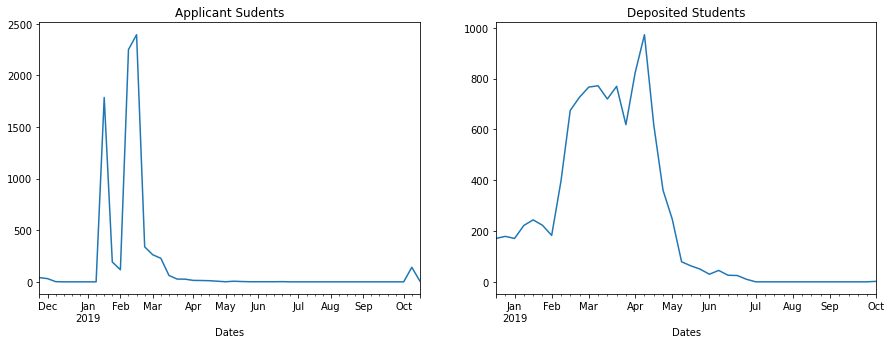

In [26]:
fig, axs = plt.subplots(1,2)

applicant_action.plot(title='Applicant Sudents',ax=axs[0],figsize=(15,5))
deposit_action.plot(title='Deposited Students',ax=axs[1],figsize=(15,5))

From the plots, we can see that most of the actions taken by **applicant students** was between first week of January to the second week of March, whereas most of the action taken by **Deposited students** spanned from first week of February until the second week of May.

___

#### Q8. Compute an “engagement score” that combines the actions that lead to higher conversion.  <a name='q8'/>
*The “engagement score” is a weighted average from 0-100% that accounts for different actions completed by an student.*

Let's examine the actions taken by deposited students. This will give us an idea of what actions are likely taken by students that end up converting.

In [27]:
deposit_df['Action'].value_counts()

emailOpened          8534
emailDelivered       2343
emailClicked         1633
emailBounced           19
emailUnsubscribed       6
Name: Action, dtype: int64

This will help us in determing a formula to calculate a percentage based score, which will help us compute an engagement score for students.

From the study of above data, the following formula for engagmenet score is developed- 

$$
\text{Engagement Score} = \frac{\text{Emails opened} + \text{Emails clicked}}{\text{Email opened} + \text{Emails clicked} + \text{Email delivered}} \times 100
$$

In [28]:
unique_user =  df['Element Id'].unique()

We make a datafram only containing `'Element Id'` and `'Action'` columns from the original dataframe and only take the actions `'emailOpened'` `'emailClicked'` `'emailDelivered'`

In [29]:
small_df = df.loc[:,['Element Id','Action']]
filt = ['emailOpened','emailClicked','emailDelivered']
small_df = small_df.loc[df['Action'].isin(filt)]

Then we create a new dataframe `'engage_df'` that counts the number of `'emailOpened'` `'emailClicked'` `'emailDelivered'` for each `'Element Id'`

In [30]:
engage_df = small_df.value_counts().unstack().fillna(0)
engage_df

Action,emailClicked,emailDelivered,emailOpened
Element Id,,,
5a45157b1ed0725bc304d120,0.0,9.0,5.0
5a45157b1ed0725bc5352b3f,2.0,8.0,6.0
5a45157b1ed0725bc86d87fd,0.0,7.0,1.0
5a45157b1ed0725bcb0180d2,0.0,5.0,0.0
5a45157b1ed0725bcc026d8f,0.0,7.0,2.0
...,...,...,...
5da536d82ca3f61c984a5b37,1.0,3.0,5.0
5da53a462ca3f61c6a6a1002,0.0,2.0,0.0
5da5cdc72ca3f61e6c0be135,0.0,1.0,0.0


Then we can calculate the engagement score based on the formula above and add a column containing the results

In [31]:
engage_df['engagement score'] = ((engage_df['emailOpened']+engage_df['emailClicked'])/(engage_df['emailOpened']+engage_df['emailClicked']+engage_df['emailDelivered']))*100
engage_df

Action,emailClicked,emailDelivered,emailOpened,engagement score
Element Id,,,,
5a45157b1ed0725bc304d120,0.0,9.0,5.0,35.714286
5a45157b1ed0725bc5352b3f,2.0,8.0,6.0,50.000000
5a45157b1ed0725bc86d87fd,0.0,7.0,1.0,12.500000
5a45157b1ed0725bcb0180d2,0.0,5.0,0.0,0.000000
5a45157b1ed0725bcc026d8f,0.0,7.0,2.0,22.222222
...,...,...,...,...
5da536d82ca3f61c984a5b37,1.0,3.0,5.0,66.666667
5da53a462ca3f61c6a6a1002,0.0,2.0,0.0,0.000000
5da5cdc72ca3f61e6c0be135,0.0,1.0,0.0,0.000000
